# Understanding & Exploring tha Data

* Dataset : Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv
* Target Variable : "ENERGY STAR Score"

* To DO:

Represent correlations visually

Train model to predict score or grade

Interpret performance to check if independent variables correlate

Evaluate using R² / MSE / F1

In [2]:
# Common Imports 

import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [4]:
df.isna().sum()/len(df)*100

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       0.000000
Address 1 (self-reported)                                      0.000000
Address 2                                                      0.000000
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

In [5]:
df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


# Finding Correlation

As this dataset contains data with various data types; to find the correlation we need to just take numerical columns.

In [7]:
df.select_dtypes(include='number').corr()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
Order,1.000000,0.056637,-0.159678,0.149153,0.060383,0.047864,-0.152684,-0.337621,0.234689,0.469983,0.854093,0.218636
Property Id,0.056637,1.000000,-0.086260,0.068352,0.000859,-0.126301,-0.073214,0.025393,0.077825,-0.021354,0.062071,0.014974
DOF Gross Floor Area,-0.159678,-0.086260,1.000000,0.103228,0.058583,-0.021242,0.828542,0.001391,-0.030588,-0.078634,-0.108475,0.051045
Year Built,0.149153,0.068352,0.103228,1.000000,0.004136,0.001829,0.082290,-0.098145,0.008558,-0.039303,0.114223,0.024097
Number of Buildings - Self-reported,0.060383,0.000859,0.058583,0.004136,1.000000,0.008121,0.146739,-0.031596,0.005214,0.015907,0.040598,0.012541
Occupancy,0.047864,-0.126301,-0.021242,0.001829,0.008121,1.000000,-0.033009,0.017700,0.050592,0.079148,0.040034,0.025632
Property GFA - Self-Reported (ft²),-0.152684,-0.073214,0.828542,0.082290,0.146739,-0.033009,1.000000,-0.021472,-0.079109,-0.097098,-0.117629,-0.002202
Latitude,-0.337621,0.025393,0.001391,-0.098145,-0.031596,0.017700,-0.021472,1.000000,0.558010,-0.163286,-0.677742,-0.049934
Longitude,0.234689,0.077825,-0.030588,0.008558,0.005214,0.050592,-0.079109,0.558010,1.000000,0.325335,-0.032852,0.229277
Community Board,0.469983,-0.021354,-0.078634,-0.039303,0.015907,0.079148,-0.097098,-0.163286,0.325335,1.000000,0.422470,0.188881


# Visual representation of Correlation

1. Heatmap

<Axes: >

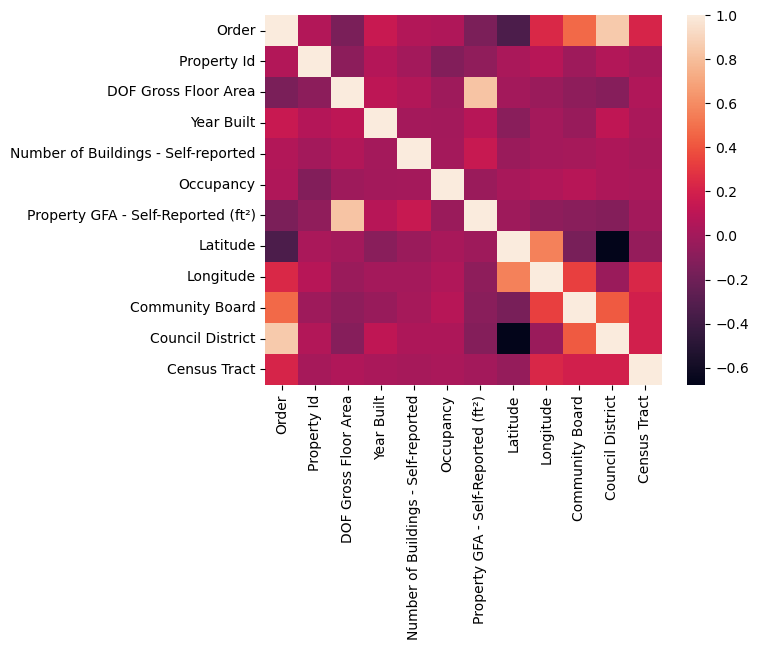

In [9]:
sns.heatmap(df.select_dtypes(include='number').corr())

In [10]:
# import warnings
# warnings.filterwarnings('ignore')
# sns.pairplot(df.select_dtypes(include='number').corr())

In [11]:
df["ENERGY STAR Score"].head()

0    Not Available
1               55
2    Not Available
3    Not Available
4    Not Available
Name: ENERGY STAR Score, dtype: object

# IMP
Here,
the datatype of our ttarget variable is Object. But to include it in Pairplot we need it into num dtype
to do so we first neet to convert strings "Not vailable" into Nan to make it considered as missing values

In [13]:
# converting strings into nan values

df["ENERGY STAR Score"] = pd.to_numeric(
    df["ENERGY STAR Score"],
    errors='coerce'
)

# lets check the missing values again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [14]:
df['ENERGY STAR Score'].isna().sum()/len(df)*100

17.91248084454282

Now, As we have 17.91% missing values in our target variable we will need to exclude the rows wich has nan values

because we cannot fill missing values in target variable by any way!!!!

but first lets plot pairplot and heatmap again

<Axes: >

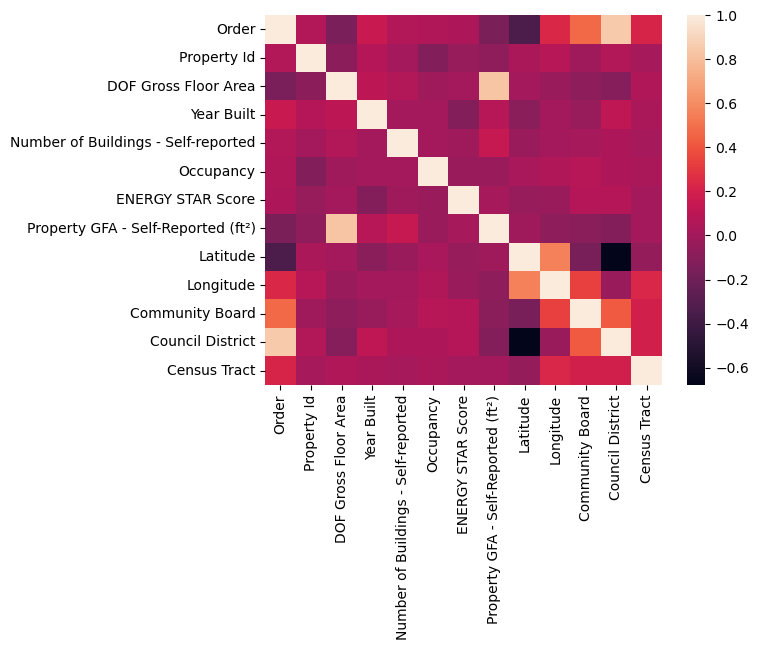

In [16]:
# Heatmap

sns.heatmap(df.select_dtypes(include='number').corr())

# what does Heatmap says

The Energy Star Score does not exhibit strong linear correlations with most numerical features, 
suggesting that energy performance is influenced by complex, 
non-linear interactions rather than individual variables.
Linear correlation is weak; advanced models may still capture patterns.

In [18]:
# To plot scatterplot we need to write some code as the scatterplot can only be plotted within two variables

# import matplotlib.pyplot as plt

# numeric_features = df.select_dtypes(include='number').columns.drop('ENERGY STAR Score')


# for col in numeric_features:
#     sns.scatterplot(x=col, y='ENERGY STAR Score', data=df)
#     plt.show()

In [19]:
# # Pairplot

# sns.pairplot(df.select_dtypes(include='number').corr())

In [20]:
df.head(6).T

,0,1,2,3,4,5
Order,1,2,3,4,5,6
Property Id,13286,28400,4778226,4778267,4778288,28402
Property Name,201/205,NYP Columbia (West Campus),MSCHoNY North,Herbert Irving Pavilion & Millstein Hospital,Neuro Institute,NYP Cornell (East Campus)
Parent Property Id,13286,28400,28400,28400,28400,28402
Parent Property Name,201/205,NYP Columbia (West Campus),NYP Columbia (West Campus),NYP Columbia (West Campus),NYP Columbia (West Campus),NYP Cornell (East Campus)
BBL - 10 digits,1013160001,1021380040,1021380030,1021390001,1021390085,1014800001
"NYC Borough, Block and Lot (BBL) self-reported",1013160001,1-02138-0040,1-02138-0030,1-02139-0001,1-02139-0085,1-01480-0001
NYC Building Identification Number (BIN),1037549,1084198; 1084387;1084385; 1084386; 1084388; 10...,1063380,1087281; 1076746,1063403,1084781; 1084780
Address 1 (self-reported),201/205 East 42nd st.,622 168th Street,3975 Broadway,161 Fort Washington Ave,710 West 168th Street,525 East 68th Street
Address 2,Not Available,Not Available,Not Available,177 Fort Washington Ave,Not Available,Not Available


# Observation

Due to the presence of inconsistent representations and missing-value placeholders, 
feature engineering and data cleaning needs to be performed prior to model training to ensure meaningful learning

In [22]:
df_c = df[["Borough", "DOF Gross Floor Area", "Largest Property Use Type", "Largest Property Use Type - Gross Floor Area (ft²)",
          "Year Built", "Occupancy", "ENERGY STAR Score", "Site EUI (kBtu/ft²)", "Weather Normalized Site EUI (kBtu/ft²)", 
           "Weather Normalized Site Electricity Intensity (kWh/ft²)", "Weather Normalized Site Natural Gas Intensity (therms/ft²)",
           "Weather Normalized Source EUI (kBtu/ft²)", "Fuel Oil #1 Use (kBtu)", 
           "Fuel Oil #2 Use (kBtu)", "Fuel Oil #4 Use (kBtu)", "Fuel Oil #5 & 6 Use (kBtu)", "Diesel #2 Use (kBtu)", "District Steam Use (kBtu)", 
           "Natural Gas Use (kBtu)", "Weather Normalized Site Natural Gas Use (therms)", 
           "Electricity Use - Grid Purchase (kBtu)", "Weather Normalized Site Electricity (kWh)", "Total GHG Emissions (Metric Tons CO2e)", 
           "Direct GHG Emissions (Metric Tons CO2e)", "Indirect GHG Emissions (Metric Tons CO2e)", "Property GFA - Self-Reported (ft²)", 
           "Water Use (All Water Sources) (kgal)", "Water Intensity (All Water Sources) (gal/ft²)", "Source EUI (kBtu/ft²)", "Water Required?",
          "Latitude", "Longitude"]]

In [23]:
df_c = df_c.copy()

# Imp:

Now that we have a complete different dataset in which only those features are present which are significant for our
model training and has significant impact on the output.
* we need to convert Object data type into Numeric
* we need to do encoding
* Finally we can check for correlation again via heatmap

In [25]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 32 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     11628 non-null  object 
 1   DOF Gross Floor Area                                        11628 non-null  float64
 2   Largest Property Use Type                                   11746 non-null  object 
 3   Largest Property Use Type - Gross Floor Area (ft²)          11746 non-null  object 
 4   Year Built                                                  11746 non-null  int64  
 5   Occupancy                                                   11746 non-null  int64  
 6   ENERGY STAR Score                                           9642 non-null   float64
 7   Site EUI (kBtu/ft²)                                         11746 non-null  object 
 

In [26]:
# Object To Numeric conversion (to get rid of NOT AVAILABLE)

numeric_cols = ["Site EUI (kBtu/ft²)", "Weather Normalized Site EUI (kBtu/ft²)", "Weather Normalized Site Electricity Intensity (kWh/ft²)", 
                "Weather Normalized Site Natural Gas Intensity (therms/ft²)", "Weather Normalized Source EUI (kBtu/ft²)", "Fuel Oil #1 Use (kBtu)", 
                "Fuel Oil #2 Use (kBtu)", "Fuel Oil #4 Use (kBtu)", "Fuel Oil #5 & 6 Use (kBtu)", "Diesel #2 Use (kBtu)", 
                "District Steam Use (kBtu)", "Natural Gas Use (kBtu)", "Weather Normalized Site Natural Gas Use (therms)", 
                "Electricity Use - Grid Purchase (kBtu)", "Weather Normalized Site Electricity (kWh)", "Total GHG Emissions (Metric Tons CO2e)", 
                "Direct GHG Emissions (Metric Tons CO2e)", "Indirect GHG Emissions (Metric Tons CO2e)", "Property GFA - Self-Reported (ft²)", 
                "Water Use (All Water Sources) (kgal)", "Water Intensity (All Water Sources) (gal/ft²)", "Source EUI (kBtu/ft²)"]

for col in numeric_cols:
    df_c[col] = pd.to_numeric(df_c[col], errors='coerce')



In [27]:
df_c["Largest Property Use Type - Gross Floor Area (ft²)"] = pd.to_numeric(
    df["Largest Property Use Type - Gross Floor Area (ft²)"],
    errors='coerce'
)

In [28]:
# ENCODING

# Binary Encoding

df_c['Water Required?'] = df_c['Water Required?'].map({"Yes":1, "No":0})

In [29]:
# One_Hot_Encoding

df_c = pd.get_dummies(
    df_c,
    columns=['Borough', 'Largest Property Use Type'],
    drop_first=True
)

In [30]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 87 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   DOF Gross Floor Area                                                        11628 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)                          11744 non-null  float64
 2   Year Built                                                                  11746 non-null  int64  
 3   Occupancy                                                                   11746 non-null  int64  
 4   ENERGY STAR Score                                                           9642 non-null   float64
 5   Site EUI (kBtu/ft²)                                                         11583 non-null  float64
 6   Weather Normalized Site EUI (kBtu/ft²)        

<Axes: >

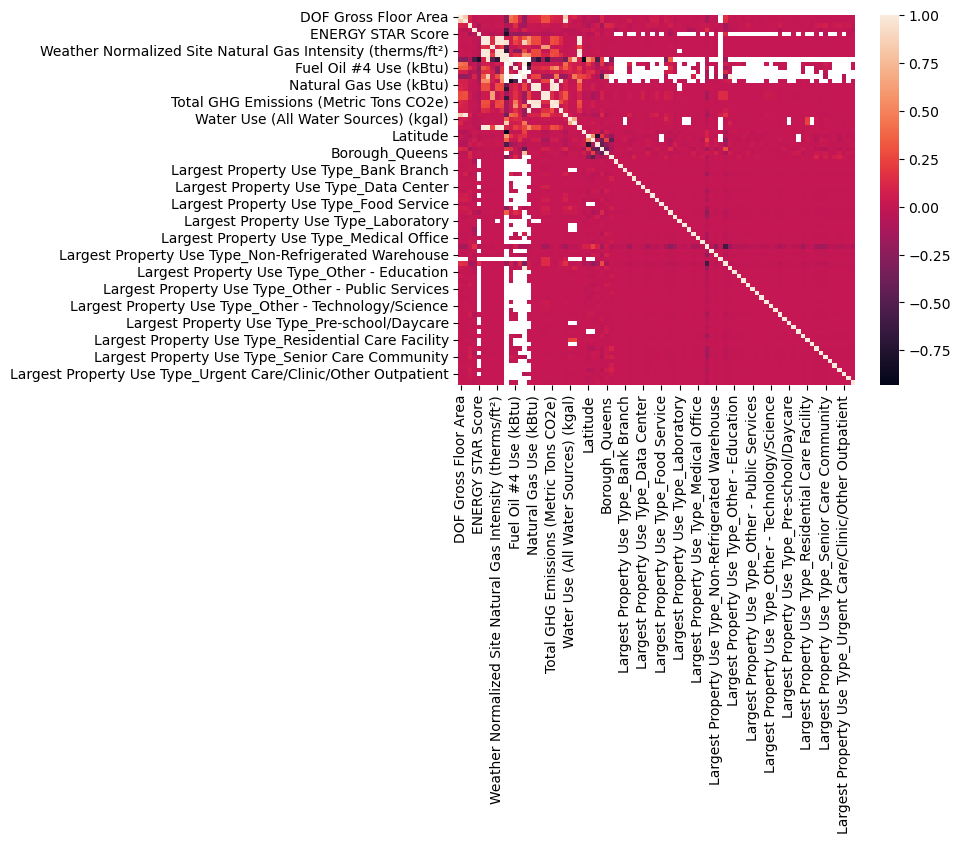

In [31]:
sns.heatmap(df_c.corr())

# Handling Missing values

In [33]:
# firstly we will clean Y (Target variable) from Nans

df_c = df_c.dropna(subset=["ENERGY STAR Score"])


# This will drop the rows where ENERGY STAR Score is NaN!
# we will handle Nan values of X after splitting

# Observation
Due to the absence of strong linear correlations, a non-linear regression model such as a Decision Tree was selected to capture complex interactions among features.

# Train_test Split

In [36]:
X = df_c.drop("ENERGY STAR Score", axis=1)
y = df_c["ENERGY STAR Score"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [37]:
# Handling Nan Values of X by filling them with median

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Model Training - Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=10, random_state=42)
D_tree.fit(X_train, y_train)
predictions = D_tree.predict(X_test)



# Evaluation

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error : ", mse)
print("R_squared error : ", r2)



Mean Squared Error :  205.8387537559319
R_squared error :  0.7750695071347563


# First result
* Mean Squared Error :  386.98776040003673
* R_squared error :  0.5771187587794623

# Result after Hyperparameter Tuning (max_depth=7, min_samples_leaf=5, min_samples_split=10)

* Mean Squared Error :  205.8387537559319
* R_squared error :  0.7750695071347563

# SOLUTION - 2

Assignment says:
Bin 
the scores into “grades” (A, B, C, D, F) and apply a classifier.  You might cluster buildings to determine if similar 
groups exist


* We will complete this task and use RandomForest Classifier to solve this peoblem. 

In [45]:
# Assigning grades to "ENERGY STAR Score" We will apply grading condition and add a new column to the df_c as 'Grade'
# and will drop the real target column at the time of train test split

def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 50:
        return 'C'
    elif score >= 25:
        return 'D'
    else:
        return 'F'

df_c['Grade'] = df_c['ENERGY STAR Score'].apply(assign_grade)

In [46]:
df_c['Grade'].value_counts()

Grade
C    2543
B    1927
A    1852
D    1693
F    1627
Name: count, dtype: int64

In [47]:
df_c['Grade'].isna().sum()/len(df)*100

0.0

Here, We do not have any missing values in our new target variable and we can proceed with RFC

# RF Training

In [50]:
# Train test Split

X1 = df_c.drop(columns=['Grade', 'ENERGY STAR Score'])
y1 = df_c['Grade']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)




In [51]:
# Handling Nan Values of X by filling them with median

from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='median')
X1_train = imputer.fit_transform(X1_train)
X1_test = imputer.transform(X1_test)

In [52]:
# Fitting

from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier()
Rfc.fit(X1_train, y1_train)


RandomForestClassifier()

In [53]:
# Preictions

predictions1 = Rfc.predict(X1_test)

# Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix : ")
print(confusion_matrix(y1_test, predictions1))
print("-"*55)
print("Classification Report :")
print(classification_report(y1_test, predictions1))
print("-"*55)
print("Accuracy Score :")
print(accuracy_score(y1_test, predictions1))

Confusion Matrix : 
[[442  82  28  10   7]
 [ 88 319 167  22   7]
 [ 24 108 458 124  27]
 [  5   9 139 224 100]
 [  1   8  18 103 373]]
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           A       0.79      0.78      0.78       569
           B       0.61      0.53      0.57       603
           C       0.57      0.62      0.59       741
           D       0.46      0.47      0.47       477
           F       0.73      0.74      0.73       503

    accuracy                           0.63      2893
   macro avg       0.63      0.63      0.63      2893
weighted avg       0.63      0.63      0.63      2893

-------------------------------------------------------
Accuracy Score :
0.6277220877981334


# Trying Gridsearch CV for better result (Hyperparameter tuning)

In [100]:
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

param_grid = {
    "max_depth": [6, 10, 14, None],
    "n_estimators": [200, 300]
}

grid = GridSearchCV(
    rf2,
    param_grid,
    scoring="f1_macro",
    cv=5,
    verbose=1
)

grid.fit(X1_train, y1_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             param_grid={'max_depth': [6, 10, 14, None],
                         'n_estimators': [200, 300]},
             scoring='f1_macro', verbose=1)

In [103]:
grid.best_params_

{'max_depth': 14, 'n_estimators': 200}

In [105]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=14, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [107]:
# Predictions

best_rf = grid.best_estimator_

new_pred = best_rf.predict(X1_test)



# Evaluation after GridSearchCV

In [110]:
print("Confusion Matrix : ")
print(confusion_matrix(y1_test, new_pred))
print("-"*55)
print("Classification Report :")
print(classification_report(y1_test, new_pred))
print("-"*55)
print("Accuracy Score :")
print(accuracy_score(y1_test, new_pred))

Confusion Matrix : 
[[446  80  25   9   9]
 [ 79 344 150  21   9]
 [ 23 119 431 139  29]
 [  4  10 113 246 104]
 [  2   6   9 106 380]]
-------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           A       0.81      0.78      0.79       569
           B       0.62      0.57      0.59       603
           C       0.59      0.58      0.59       741
           D       0.47      0.52      0.49       477
           F       0.72      0.76      0.74       503

    accuracy                           0.64      2893
   macro avg       0.64      0.64      0.64      2893
weighted avg       0.64      0.64      0.64      2893

-------------------------------------------------------
Accuracy Score :
0.6384376080193571


# NYC Energy & Water Disclosure – Machine Learning Project

Worked on the NYC Energy and Water Data Disclosure dataset (Local Law 84, 2016), focusing on predicting building energy performance. The project began with in-depth data cleaning and preprocessing, addressing inconsistent formats, “Not Available” values, incorrect data types, and high-missing or noisy features to create a reliable modeling dataset.

Built and improved a baseline regression model through feature engineering, with a Decision Tree Regressor achieving R² ≈ 0.77. The continuous ENERGY STAR Score was later converted into ordinal grades (A–F) to improve interpretability and align predictions with real-world usage.

To compare modeling strategies, trained a Random Forest Classifier on the graded target while handling class imbalance using balanced class weights. Applied hyperparameter tuning with GridSearchCV, optimizing for macro F1-score to ensure fair performance across all grade categories.

The project concluded that preserving the ordinal structure via regression-based modeling outperformed direct multiclass classification, demonstrating that appropriate problem formulation and feature quality had a greater impact than increasing model complexity.

# NYC Energy & Water Disclosure – Machine Learning Project

Cleaned and preprocessed a real-world building energy dataset, handling missing values, noisy features, and inconsistent formats to prepare a robust modeling set.

Built a Decision Tree Regressor (R² ≈ 0.77) and derived ordinal grades (A–F), improving interpretability and aligning predictions with real-world usage.

Trained a Random Forest Classifier with hyperparameter tuning, achieving macro F1 ≈ 0.64, validating the impact of feature engineering and class balancing.

Demonstrated that building and energy-related features correlate with ENERGY STAR ratings, and successfully inferred approximate scores for unrated buildings, highlighting that preserving ordinal structure outperforms direct classification.

Demonstrated that building and energy-related features exhibit meaningful correlation with ENERGY STAR ratings and successfully inferred approximate scores for unrated buildings using a regression-based ML approach.

“The model can provide approximate ENERGY STAR scores for unrated buildings, enabling insights for energy efficiency evaluation.”